In [1]:
import matplotlib
import sklearn
import tensorflow as tf
from tensorflow import keras

## Avoiding overfitting using Regularization

Practice using l1 and l2 regularization, dropout and max-norm regularization on the models

In [2]:
# Split the data into training and testing
(train_X, train_Y), (test_X, test_Y) = keras.datasets.fashion_mnist.load_data()

# Print the dimensions of the dataset
print('Train: X = ', train_X.shape)
print('Test: X = ', test_X.shape)

print('Train: Y = ', train_Y.shape)
print('Test: Y = ', test_Y.shape)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 3us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train: X =  (60000, 28, 28)
Test: X =  (10000, 28, 28)
Train: Y =  (60000,)
Test: Y =  (10000,)


In [3]:
# Normalize
train_X = train_X.astype("float32") / 255.0
test_X = test_X.astype("float32") / 255.0

In [5]:
overfitting_model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(500, activation="relu"),
        keras.layers.Dense(500, activation="relu"),
        keras.layers.Dense(500, activation="relu"),
        keras.layers.Dense(10, activation="softmax")
    ])

overfitting_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])

/Users/berukgirmay/Desktop/DeepLearning/.venv/lib/python3.13/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
#plot training vs validation accuracy and loss
def trainingVval_acc_and_loss(model_history):
    matplotlib.pyplot.figure(figsize=(15,5))
    matplotlib.pyplot.subplot(1,2,1)
    matplotlib.pyplot.plot(model_history.history['loss'], label='Train Loss')
    matplotlib.pyplot.plot(model_history.history['val_loss'], label='Validation Loss')

    matplotlib.pyplot.xlabel('Epoch')
    matplotlib.pyplot.ylabel('loss')
    matplotlib.pyplot.title('Training vs Validation loss')
    matplotlib.pyplot.legend()
    matplotlib.pyplot.grid(True)

    matplotlib.pyplot.subplot(1,2,2)
    matplotlib.pyplot.plot(model_history.history['accuracy'], label='Train Accuracy')
    matplotlib.pyplot.plot(model_history.history['val_accuracy'], label='Validation Accuracy')

    matplotlib.pyplot.xlabel('Epoch')
    matplotlib.pyplot.ylabel('Accuracy')
    matplotlib.pyplot.title('Training vs Validation Accuracy')
    matplotlib.pyplot.legend()
    matplotlib.pyplot.grid(True)
    matplotlib.pyplot.show()
    matplotlib.pyplot.show()

In [ ]:
# smaller set to force it to overfit
x_train_small = train_X[:10000]
y_train_small = train_Y[:10000]

print(x_train_small.shape)

(10000, 28, 28)


In [11]:
history_overfitting = overfitting_model.fit(x_train_small, y_train_small, epochs=20, validation_data=(test_X[:1000], test_Y[:1000]))

Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9398 - loss: 0.1580 - val_accuracy: 0.8920 - val_loss: 0.4452
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9486 - loss: 0.1286 - val_accuracy: 0.8830 - val_loss: 0.4817
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9571 - loss: 0.1152 - val_accuracy: 0.8820 - val_loss: 0.4794
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9554 - loss: 0.1115 - val_accuracy: 0.8860 - val_loss: 0.5122
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9596 - loss: 0.1041 - val_accuracy: 0.8790 - val_loss: 0.4912
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9614 - loss: 0.0974 - val_accuracy: 0.8880 - val_loss: 0.5503
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9642 - loss: 0.0909 - val_accuracy: 0.8830 - val_loss: 0.5537
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9606 - loss: 0.0973 - val_accuracy: 0.

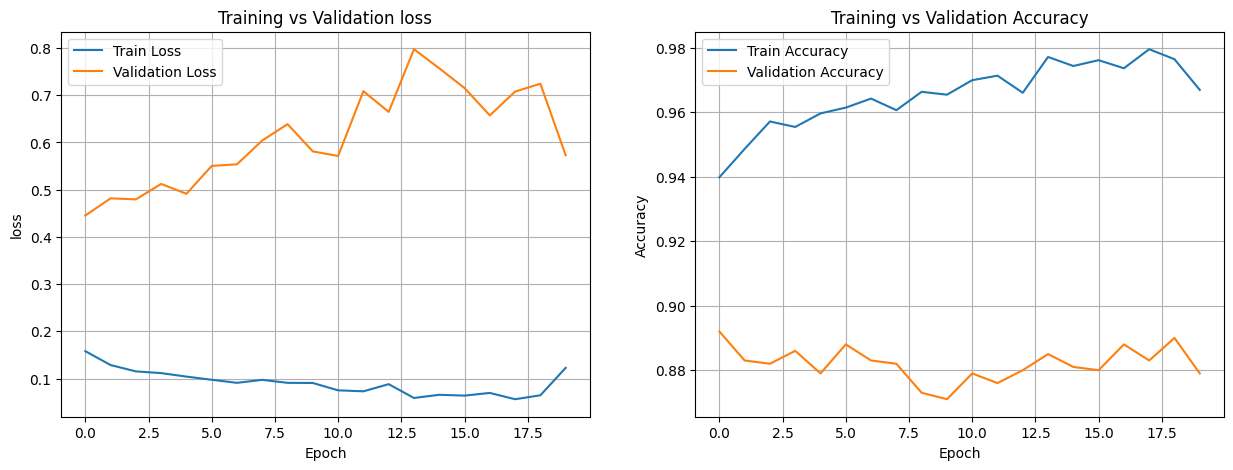

In [13]:
trainingVval_acc_and_loss(history_overfitting)

### L1 and L2 Regularazation

L1 Regularization (Lasso): Adds a penalty proportional to the absolute value of the coefficients. It encourages sparsity by driving some coefficients to zero, leading to a simpler, more interpretable model.

L2 Regularization (Ridge): Adds a penalty proportional to the square of the coefficients. It prevents the coefficients from becoming too large, reducing model complexity and improving generalization.

### Dropout

Multiple neurons in a layer extract the same, or very similar, hidden features from the input data. This can happen when the connection weights for two different neurons are nearly identical. Use **Dropout** to randomly shut down some fraction of a layer’s neurons at each training step by zeroing out the neuron values.

### MaxNorm Regularization

Max norm regularization puts a constraint on the maximum value of the weights. This forces the network to learn smaller weights and helps in preventing overfitting.

In [14]:
overfitting_model_regulirized = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(500, activation="relu",kernel_regularizer=keras.regularizers.l2(0.01), kernel_constraint=keras.constraints.MaxNorm(3) ),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(500, activation="relu",kernel_regularizer=keras.regularizers.l2(0.01), kernel_constraint=keras.constraints.MaxNorm(3) ),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(500, activation="relu",kernel_regularizer=keras.regularizers.l2(0.01), kernel_constraint=keras.constraints.MaxNorm(3)),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(10, activation="softmax", kernel_regularizer=keras.regularizers.l2(0.01))
    ])

overfitting_model_regulirized.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])

/Users/berukgirmay/Desktop/DeepLearning/.venv/lib/python3.13/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [15]:
history_regulirized = overfitting_model_regulirized.fit(x_train_small, y_train_small, epochs=20, validation_data=(test_X[:1000], test_Y[:1000]))

Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.6007 - loss: 5.3087 - val_accuracy: 0.7470 - val_loss: 1.7640
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7094 - loss: 1.5403 - val_accuracy: 0.7660 - val_loss: 1.2239
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7105 - loss: 1.3375 - val_accuracy: 0.7520 - val_loss: 1.2196
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7136 - loss: 1.2915 - val_accuracy: 0.7320 - val_loss: 1.1789
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7080 - loss: 1.2922 - val_accuracy: 0.7230 - val_loss: 1.2558
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7156 - loss: 1.2752 - val_accuracy: 0.6970 - val_loss: 1.2152
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7162 - loss: 1.2655 - val_accuracy: 0.7680 - val_loss: 1.1532
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7207 - loss: 1.2585 - val_accuracy:

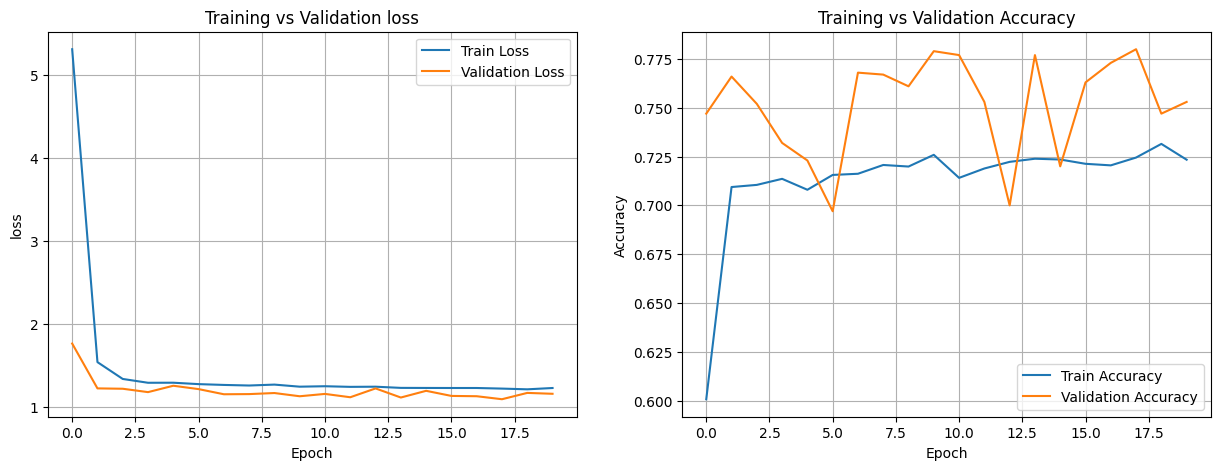

In [16]:
trainingVval_acc_and_loss(history_regulirized)

much better 

## Data augmentation: increase the diversity of your training set



In [17]:
# load the dataset
import tensorflow_datasets as tfds

(train_ds, val_ds, test_ds), metadata = tfds.load(
    'tf_flowers',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)

/Users/berukgirmay/Desktop/DeepLearning/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Dl Completed...: 100%|██████████| 1/1 [00:17<00:00, 17.05s/ url]


Dataset tf_flowers downloaded and prepared to /Users/berukgirmay/tensorflow_datasets/tf_flowers/3.0.1. Subsequent calls will reuse this data.


In [26]:
print(metadata)
print('Number of labels:',metadata.features['label'].num_classes)



tfds.core.DatasetInfo(
    name='tf_flowers',
    full_name='tf_flowers/3.0.1',
    description="""
    A large set of images of flowers
    """,
    homepage='https://www.tensorflow.org/tutorials/load_data/images',
    data_dir='/Users/berukgirmay/tensorflow_datasets/tf_flowers/3.0.1',
    file_format=tfrecord,
    download_size=218.21 MiB,
    dataset_size=221.83 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=5),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    nondeterministic_order=False,
    splits={
        'train': <SplitInfo num_examples=3670, num_shards=2>,
    },
    citation="""@ONLINE {tfflowers,
    author = "The TensorFlow Team",
    title = "Flowers",
    month = "jan",
    year = "2019",
    url = "http://download.tensorflow.org/example_images/flower_photos.tgz" }""",
)
Number of labels: 5


The images are different size

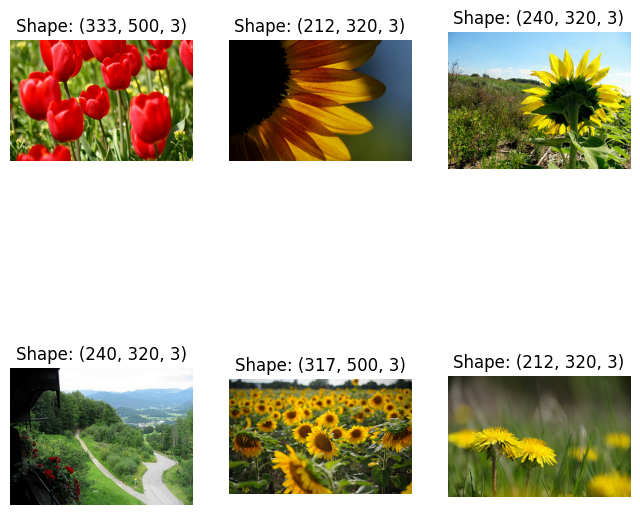

In [43]:
matplotlib.pyplot.figure(figsize=(8, 8))

for i, (image, label) in enumerate(train_ds.take(6)):
    matplotlib.pyplot.subplot(2, 3, i+1)
    matplotlib.pyplot.imshow(image)
    matplotlib.pyplot.title(f"Shape: {image.shape}")
    matplotlib.pyplot.axis("off")

matplotlib.pyplot.show()

### Resize and Rescale

2026-02-19 23:57:15.348860: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


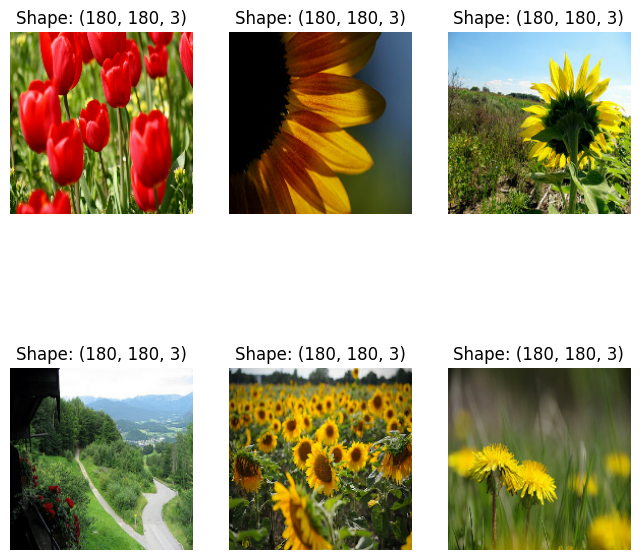

In [38]:
def preprocess(image, label):
    image = tf.image.resize(image, (180, 180))
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

train_ds_resized = train_ds.map(preprocess)

matplotlib.pyplot.figure(figsize=(8, 8))

for i, (image, label) in enumerate(train_ds_resized.take(6)):
    matplotlib.pyplot.subplot(2, 3, i+1)
    matplotlib.pyplot.imshow(image)
    matplotlib.pyplot.title(f"Shape: {image.shape}")
    matplotlib.pyplot.axis("off")

matplotlib.pyplot.show()

In [52]:
# Apply preprocessing

BATCH_SIZE = 32
# prefetch prepares the next batch while the current one is training.
train_ds = train_ds.map(preprocess).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.map(preprocess).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_ds = test_ds.map(preprocess).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

Data Augmentation pipeline

In [53]:
data_augmentation = keras.Sequential([
    keras.layers.RandomFlip("horizontal"),
    keras.layers.RandomRotation(0.1),
    keras.layers.RandomZoom(0.1),   
])

In [ ]:
flower_model = keras.Sequential([
    keras.layers.Input(shape=(180, 180, 3)),
    
    data_augmentation,
    
    keras.layers.Conv2D(32, 3, activation="relu"),
    keras.layers.MaxPooling2D(),
    
    keras.layers.Conv2D(64, 3, activation="relu"),
    keras.layers.MaxPooling2D(),
    
    keras.layers.Conv2D(128, 3, activation="relu"),
    keras.layers.MaxPooling2D(),
    
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(5, activation="softmax")  # 5 classes
])

In [55]:
flower_model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [59]:
flower_model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_6 (Sequential)       │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │     6,553,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,942,865 (76.08 MB)

 Trainable params: 6,647,621 (25.36 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 13,295,244 (50.72 MB)

In [56]:
flower_history = flower_model.fit(train_ds,
    validation_data=val_ds,
    epochs=10
)

Epoch 1/10


92/92 ━━━━━━━━━━━━━━━━━━━━ 58s 613ms/step - accuracy: 0.2493 - loss: 1.6031 - val_accuracy: 0.2425 - val_loss: 1.6016
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 55s 601ms/step - accuracy: 0.2517 - loss: 1.6031 - val_accuracy: 0.2425 - val_loss: 1.5957
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 51s 549ms/step - accuracy: 0.2517 - loss: 1.6021 - val_accuracy: 0.2425 - val_loss: 1.5949
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 55s 601ms/step - accuracy: 0.2517 - loss: 1.6017 - val_accuracy: 0.2425 - val_loss: 1.5942
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 53s 570ms/step - accuracy: 0.2517 - loss: 1.6013 - val_accuracy: 0.2425 - val_loss: 1.5940
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 50s 539ms/step - accuracy: 0.2517 - loss: 1.6011 - val_accuracy: 0.2425 - val_loss: 1.5938
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 50s 537ms/step - accuracy: 0.2517 - loss: 1.6009 - val_accuracy: 0.2425 - val_loss: 1.5938
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 52s 558ms/step - accuracy: 0.2517 - loss: 1.6008 - val_accuracy: 0.242

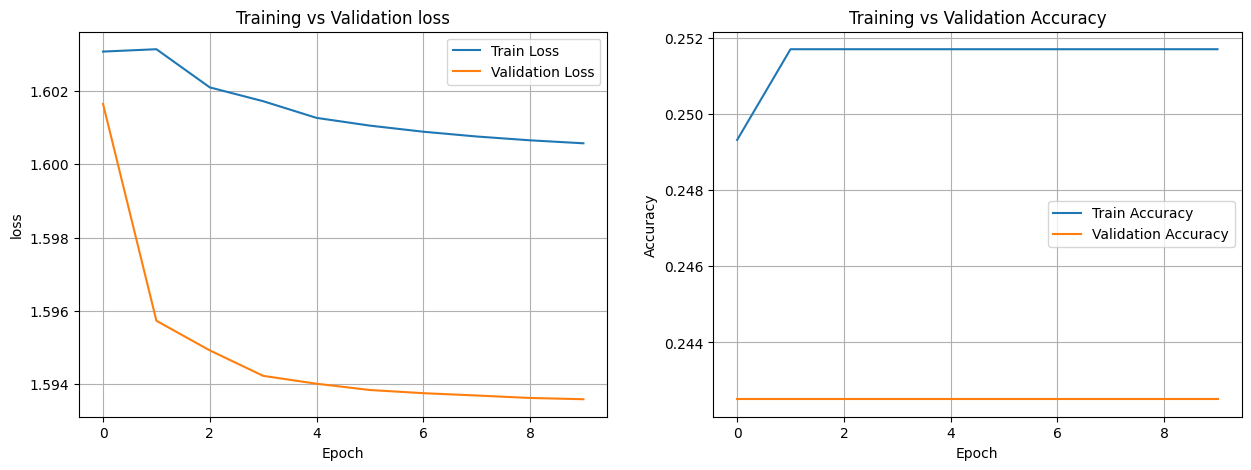

In [58]:
trainingVval_acc_and_loss(flower_history)

not good